In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
%matplotlib inline

In [7]:
data = pd.read_csv('./activitySplit/activitiesMerged')

In [3]:
walkingActivity = data[data['activity']=='walking']
walkingActivity = walkingActivity[walkingActivity['date']>'2015-01-01']

In [5]:
sorted(list(set(data['date'])), reverse=True)[:10]

['2019-05-07',
 '2019-05-06',
 '2019-04-28',
 '2019-04-27',
 '2019-04-24',
 '2019-04-23',
 '2019-04-22',
 '2019-04-21',
 '2019-04-20',
 '2019-04-19']

In [6]:
counts = Counter([x for x in walkingActivity['healthCode']])

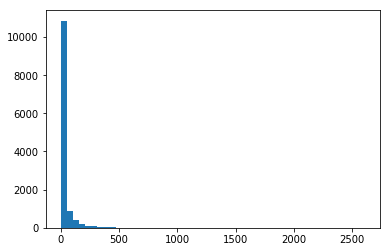

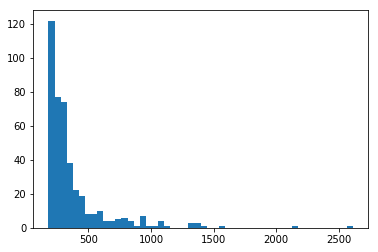

In [12]:
plt.hist(counts.values(), bins=50)
plt.show()
plt.hist([x for x in counts.values() if x > 180], bins=50)
plt.show()

In [13]:
len([k for k,v in counts.items() if v>90])

1096

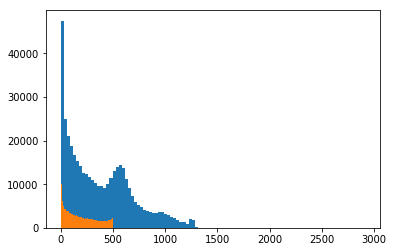

In [14]:
plt.hist([x for x in walkingActivity['numDataPoints']], bins=100)
plt.hist([x for x in walkingActivity['numDataPoints'] if x < 500], bins=100)
plt.show()

In [15]:
walkingActivityFiltered = walkingActivity[walkingActivity['numDataPoints'] > 150]
print(" %s%% of original rows kept " %str(round(100*walkingActivityFiltered.shape[0]/walkingActivity.shape[0],2)))

 68.03% of original rows kept 


In [16]:
walkingActivityFiltered['dayofweek'] = walkingActivityFiltered.apply(lambda row: pd.to_datetime(row['date']).dayofweek, axis=1)
walkingActivityFiltered['weekday'] = walkingActivityFiltered.apply(lambda row: 1 if row['dayofweek'] < 5 else 0, axis=1)

/scratch/users/jmz/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/scratch/users/jmz/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


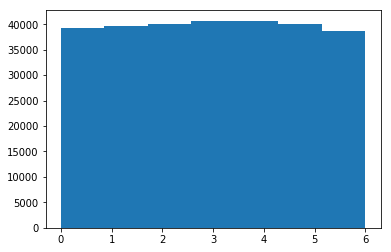

In [17]:
plt.hist(walkingActivityFiltered['dayofweek'], bins=7)
plt.show()

In [8]:
def plotActivity(data, activity, minDataPoints=150, maxDataPoints=5000, maxNumMinutes=1440):
    activity = data[data['activity']==activity]
    activityFiltered = activity[(activity['numDataPoints'] > minDataPoints)&(activity['numDataPoints'] < maxDataPoints)]
    activityFiltered['totalMinutes'] = activityFiltered.apply(lambda row: sum(row[5:53]), axis=1)
    activityFiltered = activityFiltered[activityFiltered['totalMinutes']<maxNumMinutes]

    walkingActivityFiltered['dayofweek'] = walkingActivityFiltered.apply(lambda row: pd.to_datetime(row['date']).dayofweek, axis=1)
    walkingActivityFiltered['weekday'] = walkingActivityFiltered.apply(lambda row: 1 if row['dayofweek'] < 5 else 0, axis=1)
    walkingActivityFiltered['winter'] = walkingActivityFiltered.apply(lambda row: 0 if (pd.to_datetime(row['date']).month < 9 and pd.to_datetime(row['date']).month > 2) else 1, axis=1)
    print("Proportion of winter/total days: %s" %str(round(
    walkingActivityFiltered[walkingActivityFiltered['winter']==0].shape[0]/walkingActivityFiltered.shape[0],4)))
    summerWknd = walkingActivityFiltered.drop(columns=['date','blob','dayofweek', 'healthCode','numDataPoints','totalMinutes'])[(walkingActivityFiltered['winter']==0) & (walkingActivityFiltered['weekday']==0)].mean().drop(labels=['weekday', 'winter'])
    winterWknd = walkingActivityFiltered.drop(columns=['date','blob','dayofweek', 'healthCode','numDataPoints','totalMinutes'])[(walkingActivityFiltered['winter']==1) & (walkingActivityFiltered['weekday']==0)].mean().drop(labels=['weekday', 'winter'])
    summerWkday = walkingActivityFiltered.drop(columns=['date','blob','dayofweek', 'healthCode','numDataPoints','totalMinutes'])[(walkingActivityFiltered['winter']==0) & (walkingActivityFiltered['weekday']==1)].mean().drop(labels=['weekday', 'winter'])
    winterWkday = walkingActivityFiltered.drop(columns=['date','blob','dayofweek', 'healthCode','numDataPoints','totalMinutes'])[(walkingActivityFiltered['winter']==1) & (walkingActivityFiltered['weekday']==1)].mean().drop(labels=['weekday', 'winter'])

    fig, axs = plt.subplots(2, 1, figsize=(6, 12), sharey=True)
    axs[0].plot(range(48),summerWkday, label='Summer weekday', color='red')
    axs[0].plot(range(48),winterWkday, label='Winter weekday', color='blue')
    axs[0].legend()
    axs[0].set_xticklabels(['' for x in range(48)])
    axs[1].plot(range(48),summerWknd, label='Summer weekend', color='darkred')
    axs[1].plot(range(48),winterWknd, label='Winter weekend', color='navy')
    axs[1].set_xticks(range(48))
    axs[1].set_xticklabels([x if i % 2 == 0 else '' for i,x in enumerate(summerWknd.index)], rotation='vertical')
    axs[1].legend()
    fig.suptitle(activity)

In [19]:
walkingActivityFiltered['winter'] = walkingActivityFiltered.apply(lambda row: 0 if (pd.to_datetime(row['date']).month < 9 and pd.to_datetime(row['date']).month > 2) else 1, axis=1)

/scratch/users/jmz/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
print("Proportion of winter/total days: %s" %str(round(
walkingActivityFiltered[walkingActivityFiltered['winter']==0].shape[0]/walkingActivityFiltered.shape[0],4)))

Proportion of winter/total days: 0.4837


In [13]:
summerWknd = walkingActivityFiltered.drop(columns=['date','blob','dayofweek', 'healthCode','numDataPoints'])[(walkingActivityFiltered['winter']==0) & (walkingActivityFiltered['weekday']==0)].mean().drop(labels=['weekday', 'winter'])
winterWknd = walkingActivityFiltered.drop(columns=['date','blob','dayofweek', 'healthCode','numDataPoints'])[(walkingActivityFiltered['winter']==1) & (walkingActivityFiltered['weekday']==0)].mean().drop(labels=['weekday', 'winter'])
summerWkday = walkingActivityFiltered.drop(columns=['date','blob','dayofweek', 'healthCode','numDataPoints'])[(walkingActivityFiltered['winter']==0) & (walkingActivityFiltered['weekday']==1)].mean().drop(labels=['weekday', 'winter'])
winterWkday = walkingActivityFiltered.drop(columns=['date','blob','dayofweek', 'healthCode','numDataPoints'])[(walkingActivityFiltered['winter']==1) & (walkingActivityFiltered['weekday']==1)].mean().drop(labels=['weekday', 'winter'])

In [23]:
data.columns

Index(['healthCode', 'blob', 'appVersion', 'phoneInfo', 'date', 'activity',
       'numDataPoints', '00:00:00', '00:30:00', '01:00:00', '01:30:00',
       '02:00:00', '02:30:00', '03:00:00', '03:30:00', '04:00:00', '04:30:00',
       '05:00:00', '05:30:00', '06:00:00', '06:30:00', '07:00:00', '07:30:00',
       '08:00:00', '08:30:00', '09:00:00', '09:30:00', '10:00:00', '10:30:00',
       '11:00:00', '11:30:00', '12:00:00', '12:30:00', '13:00:00', '13:30:00',
       '14:00:00', '14:30:00', '15:00:00', '15:30:00', '16:00:00', '16:30:00',
       '17:00:00', '17:30:00', '18:00:00', '18:30:00', '19:00:00', '19:30:00',
       '20:00:00', '20:30:00', '21:00:00', '21:30:00', '22:00:00', '22:30:00',
       '23:00:00', '23:30:00'],
      dtype='object')

[]

<Figure size 576x576 with 0 Axes>

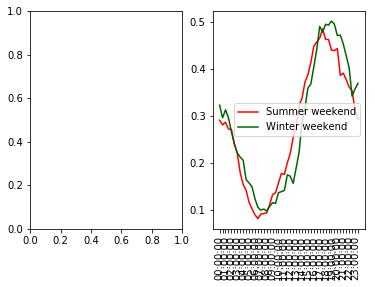

In [14]:
plt.figure(figsize=(8,8))
plt.subplots(1,2)
plt.plot(range(48),summerWknd, label='Summer weekend', color='r')
plt.plot(range(48),winterWknd, label='Winter weekend', color='darkgreen')
plt.legend()
plt.plot(range(48),summerWkday, label='Summer weekday', color='darkred')
plt.plot(range(48),winterWkday, label='Winter weekday', color='lightgreen')
plt.xticks(range(48), [x if i % 2 == 0 else '' for i,x in enumerate(summerWknd.index)], rotation='vertical')
plt.plot()
# summerWknd.drop(labels=['weekday', 'winter']).plot()
# summerWknd.drop(labels=['weekday', 'winter']).plot()

In [9]:
def filterData(data, activity, minDataPoints=150, maxDataPoints=5000, minNumMinutes = 10, maxNumMinutes=1440):
    activity = data[data['activity']==activity]
    activityFiltered = activity[(activity['numDataPoints'] > minDataPoints)&(activity['numDataPoints'] < maxDataPoints)]
    activityFiltered.loc[:,'totalMinutes'] = activityFiltered.apply(lambda row: sum(row[7:55]), axis=1)
    activityFiltered = activityFiltered[(activityFiltered['totalMinutes']>minNumMinutes)&(activityFiltered['totalMinutes']<maxNumMinutes)]
#     walkingActivityFiltered = walkingActivityFiltered[walkingActivityFiltered.apply(lambda row: False if sum(row[5:53]) < 20 else True, axis=1)]
    activityFiltered.loc[:,'dayofweek'] = activityFiltered.apply(lambda row: pd.to_datetime(row['date']).dayofweek, axis=1)
    activityFiltered.loc[:,'weekday'] = activityFiltered.apply(lambda row: 1 if row['dayofweek'] < 5 else 0, axis=1)
    activityFiltered.loc[:,'winter'] = activityFiltered.apply(lambda row: 0 if (pd.to_datetime(row['date']).month < 9 and pd.to_datetime(row['date']).month > 2) else 1, axis=1)
    print("Proportion of winter/total days: %s" %str(round(
    activityFiltered[activityFiltered['winter']==0].shape[0]/activityFiltered.shape[0],4)))
    return activityFiltered

def plotActivity(data, activity):
    summerWknd = data.drop(columns=['date','blob','dayofweek', 'healthCode','numDataPoints','totalMinutes'])[(data['winter']==0) & (data['weekday']==0)].mean().drop(labels=['weekday', 'winter'])
    winterWknd = data.drop(columns=['date','blob','dayofweek', 'healthCode','numDataPoints','totalMinutes'])[(data['winter']==1) & (data['weekday']==0)].mean().drop(labels=['weekday', 'winter'])
    summerWkday = data.drop(columns=['date','blob','dayofweek', 'healthCode','numDataPoints','totalMinutes'])[(data['winter']==0) & (data['weekday']==1)].mean().drop(labels=['weekday', 'winter'])
    winterWkday = data.drop(columns=['date','blob','dayofweek', 'healthCode','numDataPoints','totalMinutes'])[(data['winter']==1) & (data['weekday']==1)].mean().drop(labels=['weekday', 'winter'])

    fig, axs = plt.subplots(2, 1, figsize=(6, 12), sharey=True)
    axs[0].plot(range(48),summerWkday, label='Summer weekday', color='red')
    axs[0].plot(range(48),winterWkday, label='Winter weekday', color='blue')
    axs[0].legend()
    axs[0].set_xticklabels(['' for x in range(48)])
    axs[1].plot(range(48),summerWknd, label='Summer weekend', color='darkred')
    axs[1].plot(range(48),winterWknd, label='Winter weekend', color='navy')
    axs[1].set_xticks(range(48))
    axs[1].set_xticklabels([x if i % 2 == 0 else '' for i,x in enumerate(summerWknd.index)], rotation='vertical')
    axs[1].legend()
    fig.suptitle(activity)
    plt.show()

In [13]:
walkingFiltered = filterData(data, 'walking')

Proportion of winter/total days: 0.5017


In [26]:
notAvailableData = filterData(data, 'not available')

Proportion of winter/total days: 0.4847


In [27]:
stationaryData = filterData(data, 'stationary')

Proportion of winter/total days: 0.4996


In [28]:
runningData = filterData(data, 'running')

Proportion of winter/total days: 0.4955


In [29]:
cyclingData=filterData(data, 'cycling')

Proportion of winter/total days: 0.6543


In [30]:
automotiveData = filterData(data, 'automotive')

Proportion of winter/total days: 0.5529


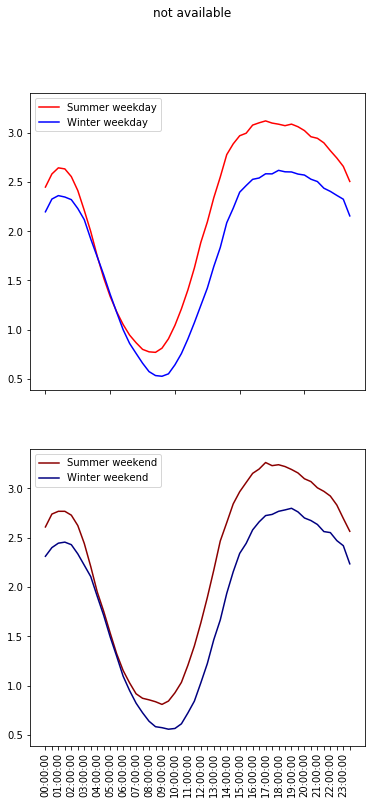

In [31]:
plotActivity(notAvailableData, 'not available')

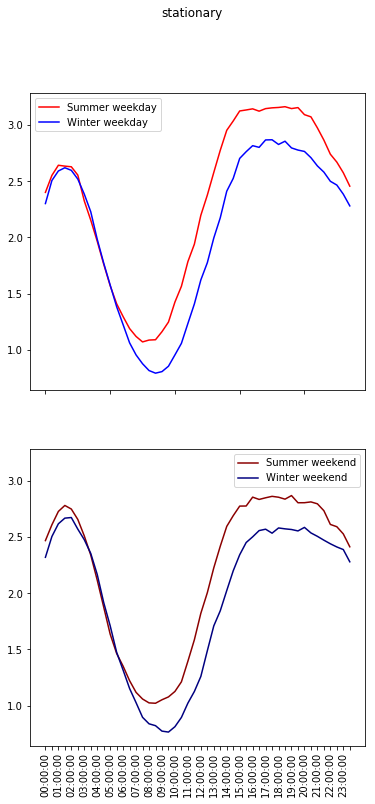

In [32]:
plotActivity(stationaryData, 'stationary')

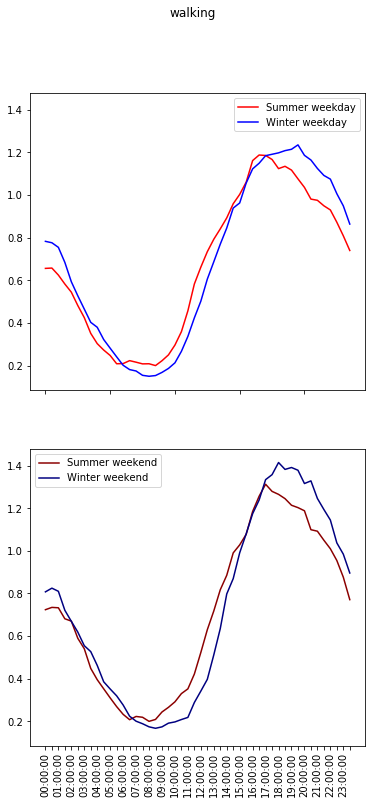

In [33]:
plotActivity(walkingFiltered, 'walking')

version 2.1.3, build 329
                                   healthCode      blob  \
1588472  c549b945-401b-4a51-9cd0-cc8c72ba73fa  36752327   
1588478  cee8696b-c1a4-4a14-9239-d22a437e30bf  36752584   
1603502  e8ce0724-86b3-4671-a310-396dc74addf5  37570647   
1604582  d8c43549-00fe-4555-a5af-ea3d421f23fc  37811064   
1615028  a9f788cf-d756-4351-8c23-bb470ce4ec5d  38979580   

                       appVersion   phoneInfo        date activity  \
1588472  version 2.1.3, build 329   iPhone8,1  2018-10-13  walking   
1588478  version 2.1.3, build 329   iPhone8,2  2018-05-30  walking   
1603502  version 2.1.3, build 329   iPhone9,3  2018-10-05  walking   
1604582  version 2.1.3, build 329  iPhone11,8  2018-09-17  walking   
1615028  version 2.1.3, build 329  iPhone10,6  2018-10-28  walking   

         numDataPoints  00:00:00  00:30:00  01:00:00  ...  21:00:00  \
1588472            806       0.0       0.0       0.0  ...  0.000000   
1588478           1085       0.0       0.0       0.0  ...

ValueError: x and y must have same first dimension, but have shapes (48,) and (51,)

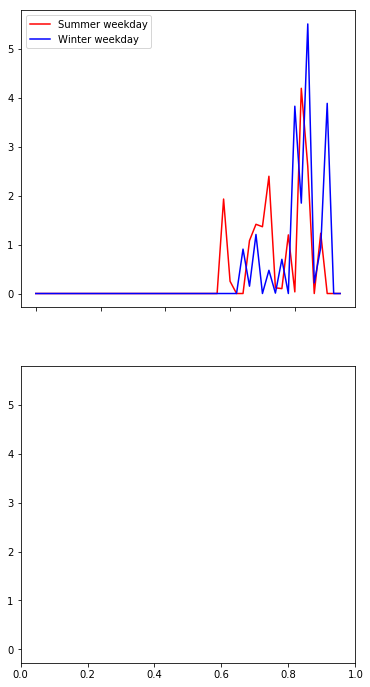

In [16]:
for appVersion in list(set(walkingFiltered['appVersion'])):
    print(appVersion)
    print(walkingFiltered[walkingFiltered['appVersion']==appVersion])
    plotActivity(walkingFiltered[walkingFiltered['appVersion']==appVersion], 'walking')

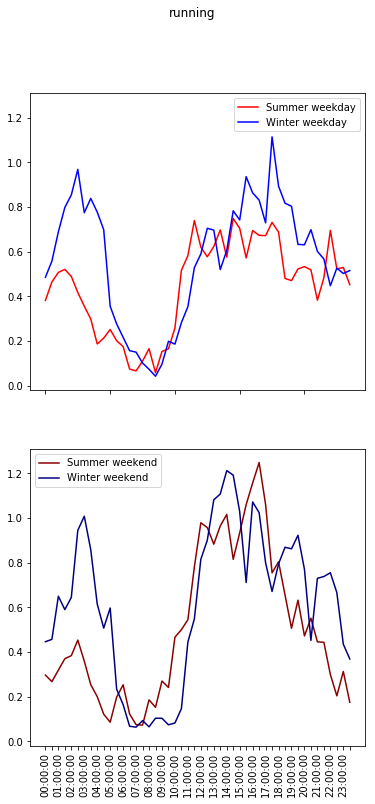

In [34]:
plotActivity(runningData, 'running')

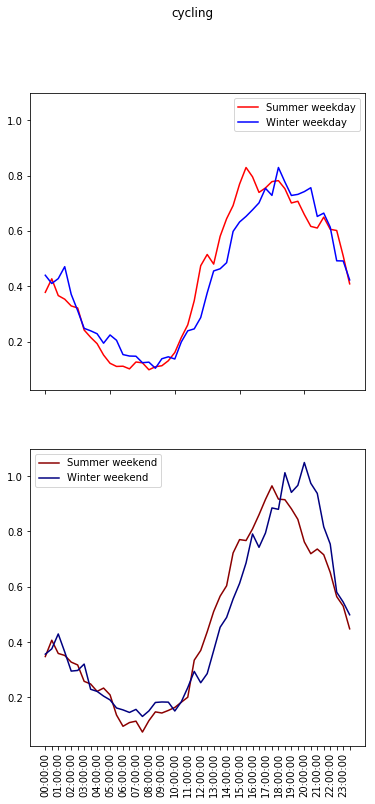

In [35]:
plotActivity(cyclingData, 'cycling')

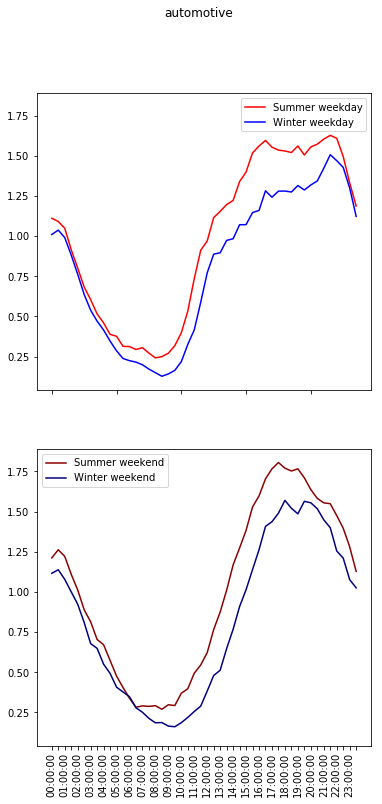

In [36]:
plotActivity(automotiveData, 'automotive')

In [52]:
def plotActivityWError(data, activity):
    """
    with error bars
    """
    summerWknd = data.drop(columns=['date','blob','dayofweek', 'healthCode','numDataPoints','totalMinutes'])[(data['winter']==0) & (data['weekday']==0)].mean().drop(labels=['weekday', 'winter'])
    summerWknde = data.drop(columns=['date','blob','dayofweek', 'healthCode','numDataPoints','totalMinutes'])[(data['winter']==0) & (data['weekday']==0)].std().drop(labels=['weekday', 'winter'])
    winterWknd = data.drop(columns=['date','blob','dayofweek', 'healthCode','numDataPoints','totalMinutes'])[(data['winter']==1) & (data['weekday']==0)].mean().drop(labels=['weekday', 'winter'])
    winterWknde = data.drop(columns=['date','blob','dayofweek', 'healthCode','numDataPoints','totalMinutes'])[(data['winter']==1) & (data['weekday']==0)].std().drop(labels=['weekday', 'winter'])
    summerWkday = data.drop(columns=['date','blob','dayofweek', 'healthCode','numDataPoints','totalMinutes'])[(data['winter']==0) & (data['weekday']==1)].mean().drop(labels=['weekday', 'winter'])
    summerWkdaye = data.drop(columns=['date','blob','dayofweek', 'healthCode','numDataPoints','totalMinutes'])[(data['winter']==0) & (data['weekday']==1)].std().drop(labels=['weekday', 'winter'])
    winterWkday = data.drop(columns=['date','blob','dayofweek', 'healthCode','numDataPoints','totalMinutes'])[(data['winter']==1) & (data['weekday']==1)].mean().drop(labels=['weekday', 'winter'])
    winterWkdaye = data.drop(columns=['date','blob','dayofweek', 'healthCode','numDataPoints','totalMinutes'])[(data['winter']==1) & (data['weekday']==1)].std().drop(labels=['weekday', 'winter'])

    fig, axs = plt.subplots(2, 1, figsize=(6, 12), sharey=True)
    axs[0].errorbar(range(48),summerWkday, summerWkdaye, label='Summer weekday', color='red')
    axs[0].errorbar(range(48),winterWkday, winterWkdaye, label='Winter weekday', color='blue')
    axs[0].legend()
    axs[0].set_xticklabels(['' for x in range(48)])
    axs[1].errorbar(range(48),summerWknd, summerWknde, label='Summer weekend', color='darkred')
    axs[1].errorbar(range(48),winterWknd, winterWknde, label='Winter weekend', color='navy')
    axs[1].set_xticks(range(48))
    axs[1].set_xticklabels([x if i % 2 == 0 else '' for i,x in enumerate(summerWknd.index)], rotation='vertical')
    axs[1].legend()
    fig.suptitle(activity)

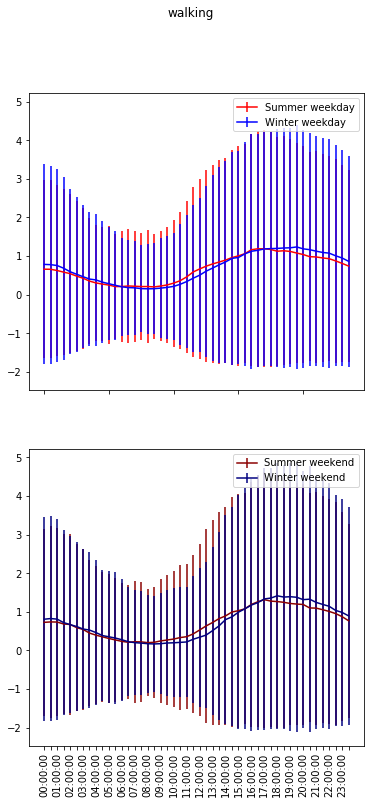

In [53]:
plotActivityWError(walkingFiltered, 'walking')

For those with more than 90 days

In [55]:
def thresholdDataByDays(data, days, activity):
    moreThanDays = set([k for k,v in counts.items() if v>days])
    print("Number of people that have more than %s days is %s." %(str(days), str(len(moreThanDays))))
    moreThanDaysData = data[data.apply(lambda row: True if row['healthCode'] in moreThanDays else False, axis=1)]
    plotActivity(moreThanDaysData, activity)

Number of people that have more than 90 days is 1088.


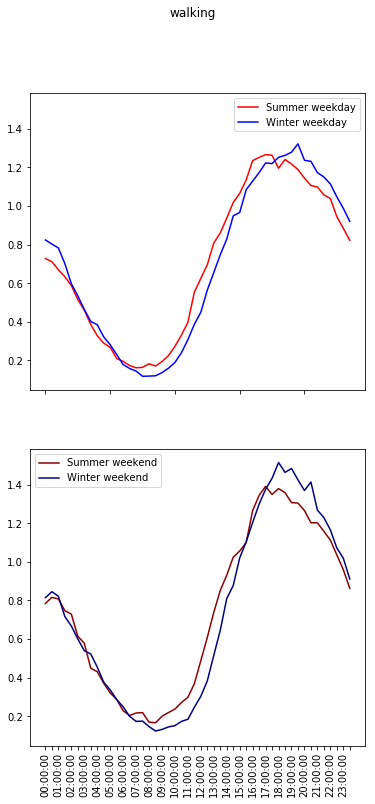

Number of people that have more than 180 days is 422.


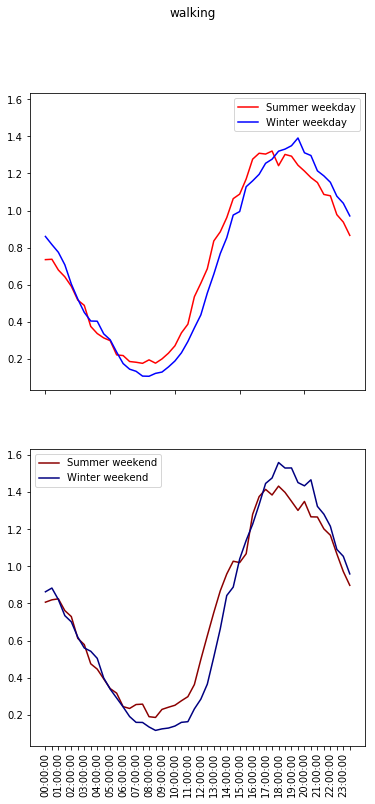

Number of people that have more than 365 days is 117.


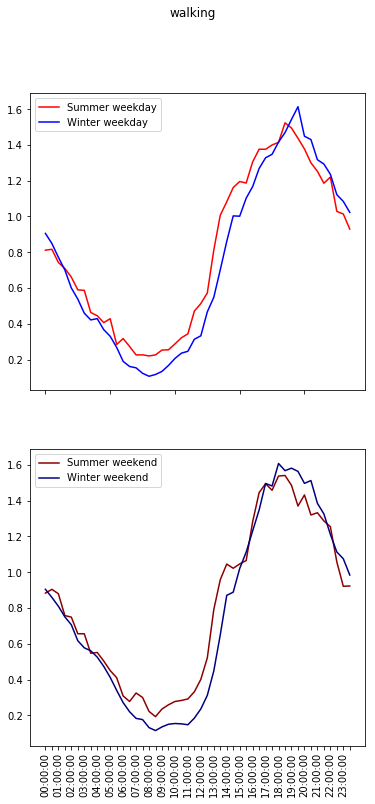

In [56]:
thresholdDataByDays(walkingFiltered, 90, 'walking')
thresholdDataByDays(walkingFiltered, 180, 'walking')
thresholdDataByDays(walkingFiltered, 365, 'walking')

In [144]:
data[(data['healthCode']== 'f655e971-ca7f-4b7b-9554-7395dbd80c5b') & (data['numDataPoints']>150)]

In [154]:
longestFollow = data[(data['healthCode']== 'f3769e80-484b-414f-9acc-d3ef8495d8f0') & (data['numDataPoints']>150) & (data.iloc[:,5:53].sum(axis=1) > 10)]